# Part 1: Perceptron
## (i)
### Step 1: Data loading and initialisation

Step 1.1: The read_csv method of the pandas library was used to load a dataset containing fish annular scale diameters (freshwater and brackish) and the classification of the fish (Canadian or Alaskan).

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('Fish_data.csv')

Step 1.2: The first and last rows from the dataset are extracted as samples for training the model.

In [26]:
# Extract the first and last rows
first_row = data.iloc[0]
last_row = data.iloc[-1]

### Step 2: Define the function and set initial parameters

- Activation function: computes a linear combination of the input x and the weights weights, the output of this function is used to determine the classification (1 or 0).
- Weight update function: updates the weights according to the prediction error (difference between the target value t and the predicted value y), the adjustment of the weights depends on the learning rate learning_rate.

In [27]:
# Initial weights and learning rates
weights = np.array([102, -28, 5.0])  # w1, w2, bias
learning_rate = 0.5

# Activation function
def activation(x, weights):
    return np.dot(x, weights[:2]) + weights[2]

# Weight update function
def update_weights(x, y, t, weights, learning_rate):
    error = t - y
    weights[:2] += learning_rate * error * x  # Update w1 and w2
    weights[2] += learning_rate * error  # Update Bias
    return weights

### Step 3: Plot and train the model

- In two epochs, the model is trained using two sample points.
- After each weight update, new classification boundaries are drawn to visualise the learning process.

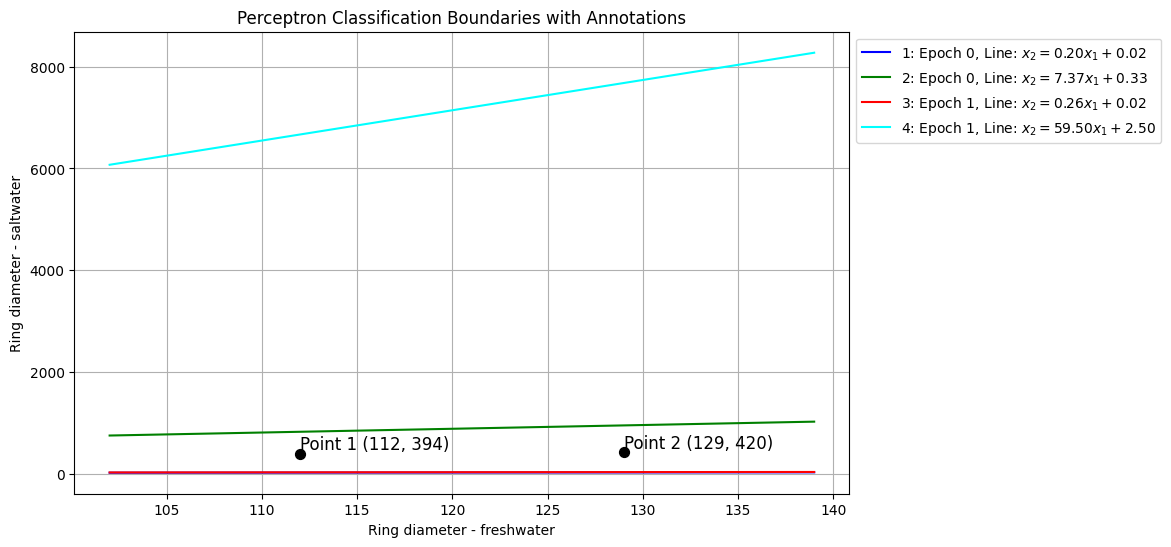

In [28]:
# Drawing classification boundaries in a single plot

# Drawing classification boundaries with equations and point annotations
def plot_boundary(points, epoch_data):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']
    
    for index, (epoch, weights) in enumerate(epoch_data):
        x_values = np.array([min(points[:, 0]) - 10, max(points[:, 0]) + 10])
        m = -weights[0] / weights[1]  # Slope
        c = -weights[2] / weights[1]  # Intercept
        y_values = m * x_values + c
        label = f'{index + 1}: Epoch {epoch}, Line: $x_2 = {m:.2f}x_1 + {c:.2f}$'
        plt.plot(x_values, y_values, color=colors[index % len(colors)], label=label)
    
    
    # Plot points with annotations
    for point, label in zip(points, ['Point 1', 'Point 2']):
        plt.scatter(point[0], point[1], c='black', s=50)  # Draw the point
        plt.text(point[0], point[1], f'{label} ({point[0]}, {point[1]})', fontsize=12, verticalalignment='bottom')

    plt.xlabel('Ring diameter - freshwater')
    plt.ylabel('Ring diameter - saltwater')
    plt.title('Perceptron Classification Boundaries with Annotations')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
    plt.grid(True)
    plt.show()

# Two point data for plotting
points = np.array([
    [first_row['RingDiam_fresh_water'], first_row['RingDiam_salt_water'], first_row['Canadian_0_Alaskan_1']],
    [last_row['RingDiam_fresh_water'], last_row['RingDiam_salt_water'], last_row['Canadian_0_Alaskan_1']]
])

# Train the model and draw the classification boundary

epoch_data = []  # Used to store weights, biases, and epoch info

for epoch in range(2):
    for row in [first_row, last_row]:
        x = np.array([row['RingDiam_fresh_water'], row['RingDiam_salt_water']])
        target = row['Canadian_0_Alaskan_1']
        output = 1 if activation(x, weights) > 0 else 0
        weights = update_weights(x, output, target, weights, learning_rate)
        epoch_data.append((epoch, weights.copy())) 
       
# Plot all boundaries after training
plot_boundary(points, epoch_data)

## Weights update analysis

### Input data
Two specific data points (from the first and last rows of the dataset) are used to train the perceptron model:

- **First row** (Sample 1):
  - `RingDiam_fresh_water`: 112
  - `RingDiam_salt_water`: 394
  - `Canadian_0_Alaskan_1`: 0 (Target)

- **Last row** (Sample 2):
  - `RingDiam_fresh_water`: 129
  - `RingDiam_salt_water`: 420
  - `Canadian_0_Alaskan_1`: 1 (Target)

### Initialising weights and biases
The initial weights and biases are set as follows:
$$
\( w1 = 102 \)
$$
$$
\( w2 = -28 \)
$$
$$
\( \text{bias} = 5.0 \)
$$

### Weight Update Steps
Learning rate used 
$$
\( \beta = 0.5 \)
$$

#### Epoch 0, Sample 1 calculations:
$$
\( x1 = 112 \)
$$
$$
\( x2 = 394 \)
$$
$$
\( t = 0 \)
$$

Activation value:
$$
\text{Activation} = 102 \times 112 + (-28) \times 394 + 5 = 11424 - 11032 + 5 = 397
$$
$$
y = 1 \quad (\text{because Activation > 0})
$$

**Weights update**(weights need to be reduced due to \( t = 0, y = 1 \)):
$$
w1_{\text{new}} = 102 - 0.5 \times (1 - 0) \times 112 = 102 - 56 = 46
$$
$$
w2_{\text{new}} = -28 - 0.5 \times (1 - 0) \times 394 = -28 - 197 = -225
$$
$$
\text{bias}_{\text{new}} = 5 - 0.5 \times (1 - 0) = 4.5
$$

Classification boundary line:
$$
x2 = -\frac{w1}{w2}x1 - \frac{\text{bias}}{w2} = -\frac{46}{-225}x1 - \frac{4.5}{-225} = \frac{46}{225}x1 + \frac{4.5}{225}
$$
After simplifying:
$$
x2 = 0.2044x1 + 0.02
$$

#### Epoch 0, Sample 2 calculations:
$$
\( x1 = 129 \)
$$
$$
\( x2 = 420 \)
$$
$$
\( t = 1 \)
$$

Activation value:
$$
\text{Activation} = 46 \times 129 + (-225) \times 420 + 4.5 = 5934 - 94500 + 4.5 = -88561.5
$$
$$
y = 0 \quad (\text{because Activation < 0})
$$

**Weights update**(weights need to be increased due to \( t = 1, y = 0 \)):
$$
w1_{\text{new}} = 46 + 0.5 \times (1 - 0) \times 129 = 46 + 64.5 = 110.5
$$
$$
w2_{\text{new}} = -225 + 0.5 \times (1 - 0) \times 420 = -225 + 210 = -15
$$
$$
\text{bias}_{\text{new}} = 4.5 + 0.5 \times (1 - 0) = 5.0
$$

Classification boundary line:
$$
x2 = -\frac{110.5}{-15}x1 - \frac{5.0}{-15} = \frac{110.5}{15}x1 + \frac{5.0}{15}
$$
After simplifying:
$$
x2 = 7.3667x1 + 0.3333
$$

#### Epoch 1, Sample 1 calculations:
$$
\( x1 = 112 \)
$$
$$
\( x2 = 394 \)
$$
$$
\( t = 0 \)
$$

Activation value:
$$
\text{Activation} = 110.5 \times 112 + (-15) \times 394 + 5 = 12376 - 5910 + 5 = 6471
$$
$$
y = 1 \quad (\text{because Activation > 0})
$$

**Weights update**(weights need to be reduced due to \( t = 0, y = 1 \)):
$$
w1_{\text{new}} = 110.5 - 0.5 \times (1 - 0) \times 112 = 110.5 - 56 = 54.5
$$
$$
w2_{\text{new}} = -15 - 0.5 \times (1 - 0) \times 394 = -15 - 197 = -212
$$
$$
\text{bias}_{\text{new}} = 5 - 0.5 \times (1 - 0) = 4.5
$$

Classification boundary line:
$$
x2 = -\frac{54.5}{-212}x1 - \frac{4.5}{-212} = \frac{54.5}{212}x1 + \frac{4.5}{212}
$$
After simplifying:
$$
x2 = 0.2571x1 + 0.0212
$$

#### Epoch 1, Sample 2 calculations:
$$
\( x1 = 129 \)
$$
$$
\( x2 = 420 \)
$$
$$
\( t = 1 \)
$$

Activation value:
$$
\text{Activation} = 54.5 \times 129 + (-212) \times 420 + 4.5 = 7030.5 - 89040 + 4.5 = -8200
$$
$$
y = 0 \quad (\text{because Activation < 0})
$$

**Weights update**(weights need to be increased due to \( t = 1, y = 0 \)):
$$
w1_{\text{new}} = 54.5 + 0.5 \times (1 - 0) \times 129 = 54.5 + 64.5 = 119
$$
$$
w2_{\text{new}} = -212 + 0.5 \times (1 - 0) \times 420 = -212 + 210 = -2
$$
$$
\text{bias}_{\text{new}} = 4.5 + 0.5 \times (1 - 0) = 5.0
$$

Classification boundary line:
$$
x2 = -\frac{119}{-2}x1 - \frac{5.0}{-2} = \frac{119}{2}x1 + \frac{5.0}{2}
$$
After simplifying:
$$
x2 = 59.5x1 + 2.5
$$

### Table of changes in weights and biases

| Epoch | Sample | \( w1 \) | \( w2 \) | Bias  |
|-------|--------|----------|----------|-------|
| 0     | 1      | 46       | -225     | 4.5   |
| 0     | 2      | 110.5    | -15      | 5.0   |
| 1     | 1      | 54.5     | -212     | 4.5   |
| 1     | 2      | 119      | -2       | 5.0   |
